In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load cleaned dataset 
prenatal=pd.read_csv("globaldataset_Prenatalcare.csv")
maternal=pd.read_csv("Global_MaternalDeath.csv")
prenatal = prenatal.drop(columns=["Disaggregation"])
maternal = maternal.drop(columns=["Disaggregation"])

/var/folders/ht/nmq42dgn7qv_gb6fg6zcg1640000gn/T/ipykernel_58718/1374164101.py:21: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/Users/aasmagupta/Documents/College/eda_nfhs/ml_env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


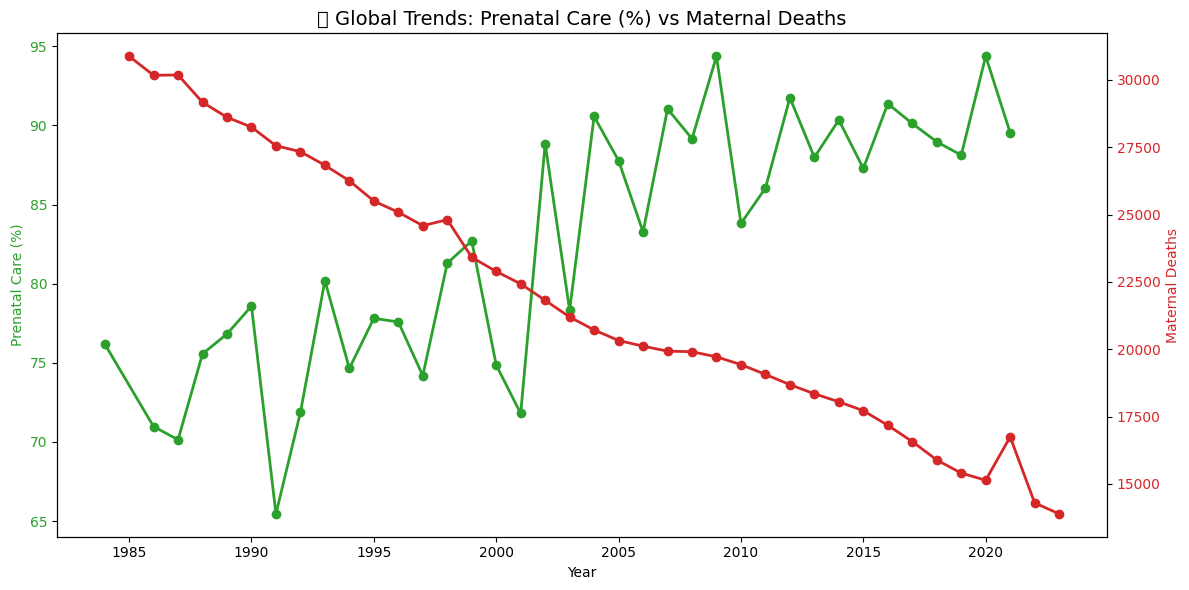

In [4]:

# Prenatal Care vs Maternal Deaths
prenatal_trend = prenatal.groupby("Year")["Value"].mean()
maternal_trend = maternal.groupby("Year")["Value"].mean()

# Plot with dual axis
fig, ax1 = plt.subplots(figsize=(12,6))

color = 'tab:green'
ax1.set_xlabel("Year")
ax1.set_ylabel("Prenatal Care (%)", color=color)
ax1.plot(prenatal_trend.index, prenatal_trend.values, marker="o", color=color, linewidth=2, label="Prenatal Care (%)")
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # second axis
color = 'tab:red'
ax2.set_ylabel("Maternal Deaths", color=color)
ax2.plot(maternal_trend.index, maternal_trend.values, marker="o", color=color, linewidth=2, label="Maternal Deaths")
ax2.tick_params(axis='y', labelcolor=color)

plt.title("🌍 Global Trends: Prenatal Care (%) vs Maternal Deaths", fontsize=14)
fig.tight_layout()
plt.show()


/var/folders/ht/nmq42dgn7qv_gb6fg6zcg1640000gn/T/ipykernel_58718/1622596919.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_maternal.values, y=top_maternal.index, palette="Reds_r")


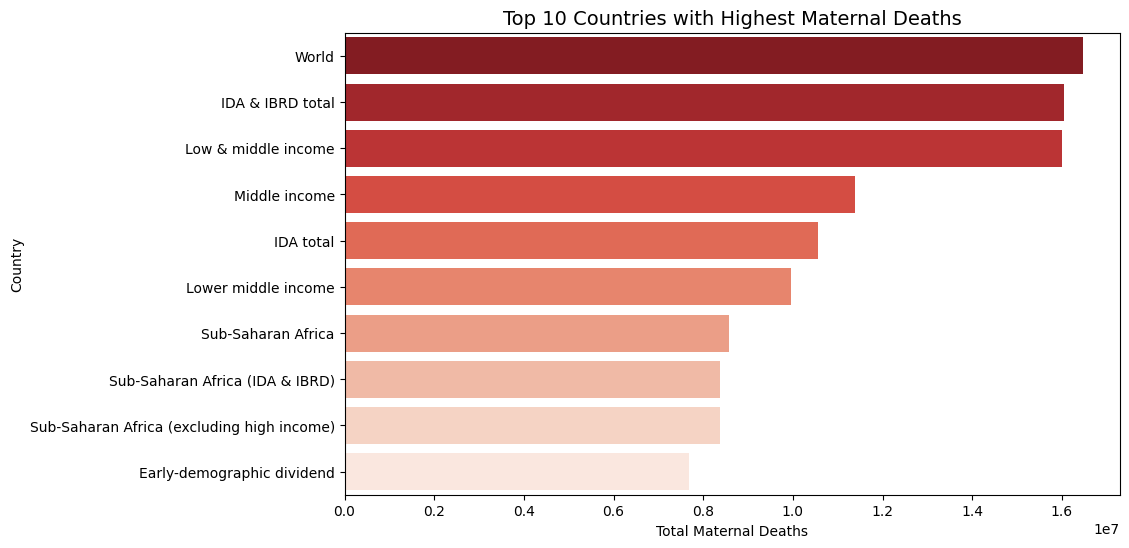

In [5]:

#Top 10 Countries with Highest Maternal Deaths
top_maternal = maternal.groupby("Country Name")["Value"].sum().nlargest(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_maternal.values, y=top_maternal.index, palette="Reds_r")
plt.title("Top 10 Countries with Highest Maternal Deaths", fontsize=14)
plt.xlabel("Total Maternal Deaths")
plt.ylabel("Country")
plt.show()



/var/folders/ht/nmq42dgn7qv_gb6fg6zcg1640000gn/T/ipykernel_58718/3818207259.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=low_prenatal.values, y=low_prenatal.index, palette="Blues_r")


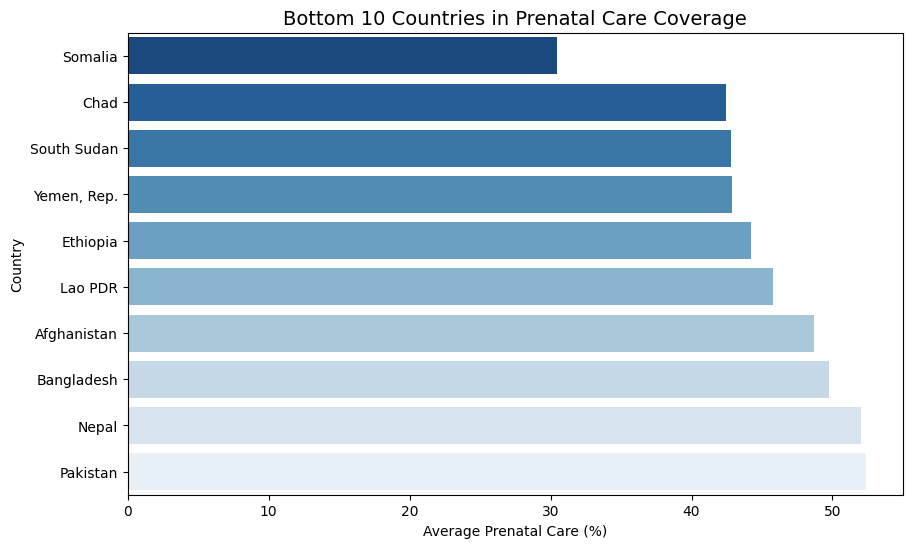

In [6]:

# Bottom 10 Countries by Prenatal Care
low_prenatal = prenatal.groupby("Country Name")["Value"].mean().nsmallest(10)

plt.figure(figsize=(10,6))
sns.barplot(x=low_prenatal.values, y=low_prenatal.index, palette="Blues_r")
plt.title("Bottom 10 Countries in Prenatal Care Coverage", fontsize=14)
plt.xlabel("Average Prenatal Care (%)")
plt.ylabel("Country")
plt.show()


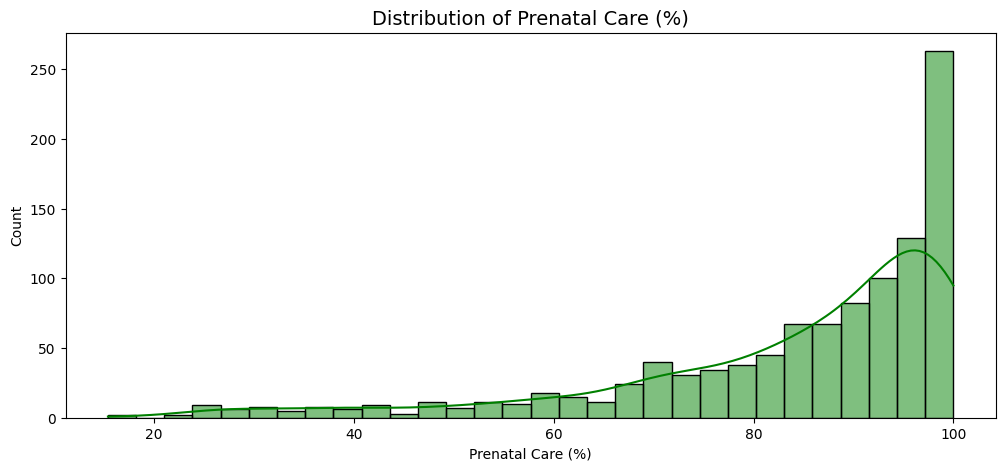

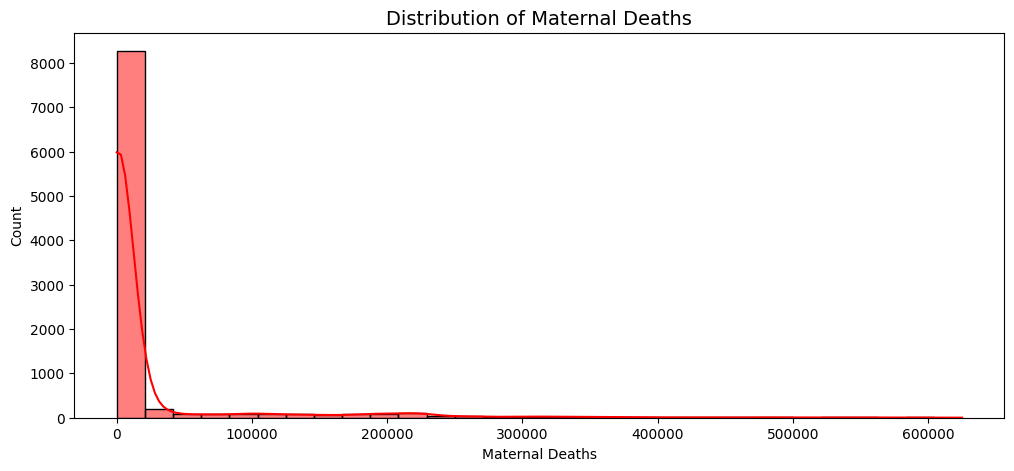

In [7]:

# Correlation: Prenatal Care vs Maternal Deaths
plt.figure(figsize=(12,5))
sns.histplot(prenatal["Value"], kde=True, color="green", bins=30)
plt.title("Distribution of Prenatal Care (%)", fontsize=14)
plt.xlabel("Prenatal Care (%)")
plt.show()

plt.figure(figsize=(12,5))
sns.histplot(maternal["Value"], kde=True, color="red", bins=30)
plt.title("Distribution of Maternal Deaths", fontsize=14)
plt.xlabel("Maternal Deaths")
plt.show()

